In [2]:
from dataloader import GraphDataset, GraphTextDataset, TextDataset
import networkx as nx
import torch

c:\Users\travail\Documents\Cours\Altegrad\Compet\Altegrad MVA 2023-2024\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import numpy as np


def process_graph(raw_path):
    gt = np.load("./data/token_embedding_dict.npy", allow_pickle=True)[()]
    edge_index = []
    x = []
    with open(raw_path, "r") as f:
        next(f)
        for line in f:
            if line != "\n":
                edge = (*map(int, line.split()),)
                edge_index.append(edge)
            else:
                break
        next(f)
        for line in f:  # get mol2vec features:
            substruct_id = line.strip().split()[-1]
            if substruct_id in gt.keys():
                x.append(gt[substruct_id])
            else:
                x.append(gt["UNK"])
        return torch.LongTensor(edge_index).T, torch.FloatTensor(x)

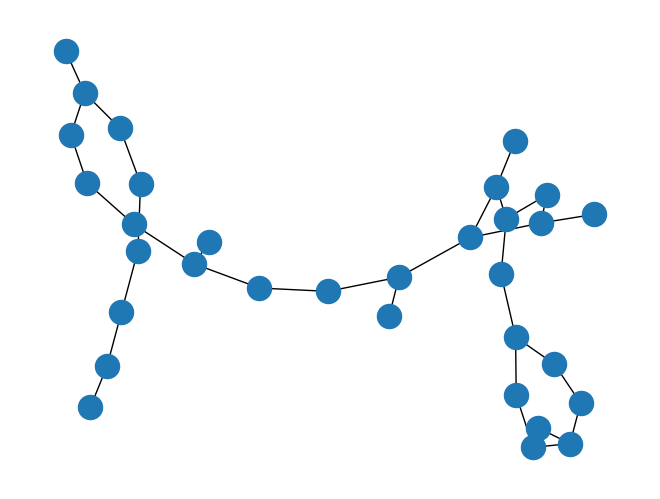

In [25]:
import torch_geometric
from torch_geometric.data import Data


path = "data/raw/146672904.graph"
edge_index, x = process_graph(path)
data = Data(
    x=x,
    edge_index=edge_index,
)

g = torch_geometric.utils.to_networkx(data, to_undirected=True)
nx.draw(g)

In [21]:
x

tensor([[ 0.0675, -0.1169,  0.2940,  ...,  0.1557,  0.1334, -0.0677],
        [-0.0512, -0.3466, -0.1322,  ...,  0.1199, -0.0140,  0.2444],
        [-0.0564, -0.2438,  0.0534,  ...,  0.1154, -0.0022,  0.1562],
        ...,
        [ 0.1960, -0.0367,  0.0419,  ...,  0.0549,  0.3210,  0.0143],
        [ 0.1628, -0.1553,  0.2417,  ...,  0.2659,  0.1934, -0.0798],
        [ 0.2763,  0.3478,  0.0340,  ..., -0.0065, -0.3067, -0.1269]])